In [1]:
import matplotlib.pylab as plt 
%matplotlib inline
import numpy as np
import rubin_sim.maf_proto as maf
import pandas as pd
import sqlite3
import healpy as hp
import copy

from rubin_sim.data import get_baseline
from os.path import basename


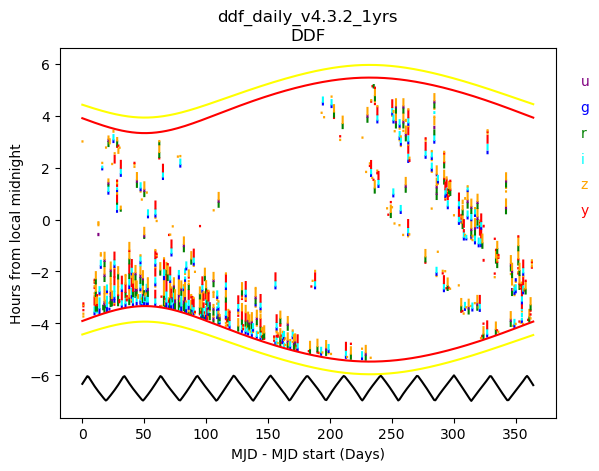

In [2]:
db_file = "ddf_daily_v4.3.2_1yrs.db"
run_name = basename(db_file).replace('.db', '')
con = sqlite3.connect(db_file)
df = pd.read_sql('select * from observations;', con)
con.close()
visits_array = df.to_records(index=False)


# If we want to use some automated label generation 
info = {"run_name": run_name}
ddf_indx = ['DD:' in note for note in visits_array["scheduler_note"]]

sub_data = visits_array[ddf_indx]
info['observations_subset'] = "DDF" 
pm = maf.PlotHourglass(info=info)
fig = pm(sub_data)

f

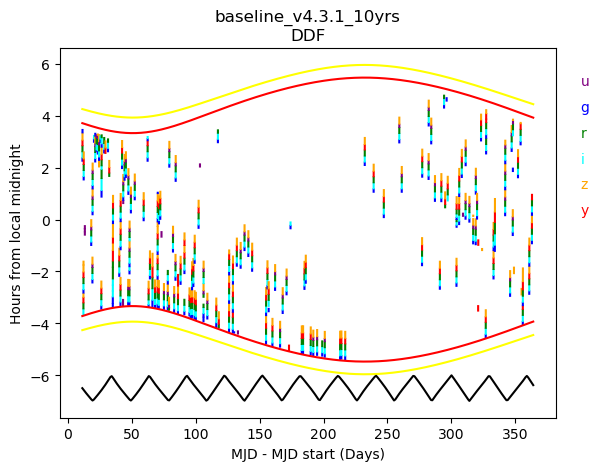

In [3]:

db_file = get_baseline()
run_name = basename(db_file).replace('.db', '')
con = sqlite3.connect(db_file)
df = pd.read_sql('select * from observations where night <= 365;', con)
con.close()
visits_array = df.to_records(index=False)


# If we want to use some automated label generation 
info = {"run_name": run_name}
ddf_indx = ['DD:' in note for note in visits_array["scheduler_note"]]

sub_data = visits_array[ddf_indx]
info['observations_subset'] = "DDF" 
pm = maf.PlotHourglass(info=info)
fig = pm(sub_data)
